# Business problem:

Companies usually have a greater focus on customer acquisition than customer. However, it can cost anywhere between five to twenty five times more to attract a new customer than retain an existing one. Increasing customer retention rates by 5% can increase profits by 25%, according to a research done by Bain & Company.

Churn is a metric that measures the no. of customers who stop doing business with a company. Through this metric, most businesses would try to understand the reason behind churn numbers and tackle those factors with reactive action plans.

But what if you could identify a customer who is likely to churn and take appropriate steps to prevent it from happening? The reasons that lead customers to the cancellation decision can be numerous, ranging from poor service quality to new competitors entering the market. Usually, there is no single reason, but a combination of factors that result to customer churn.

Although the customers have churned, their data is still available. Through machine learning we can sift through this valuable data to discover patterns and understand the combination of different factors which lead to customer churn.

Our goal in this project is to identify behavior among customers who are likely to churn. Subsequent to that we need to train a machine learning model to identify these signals from a customer before they churn. Once deployed, our model will identify customers who might churn and alert us to take necessary steps to prevent their churn.

# Initialisation

In [1]:
###############################################################################
#
#Importing libraries
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
import warnings
###############################################################################
#
#Notebook options
#
plt.style.use('fivethirtyeight')
pd.options.display.max_columns =100
warnings.filterwarnings('ignore')
###############################################################################
#
#Reading the data
#
df = pd.read_csv(r"../Data/Telco-Customer-Churn.csv")
df.drop(["customerID"], axis=1, inplace=True)
###############################################################################

# Data description

In [2]:
df.describe(include="all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


In [3]:
print("Are there any missing columns \n", ((pd.DataFrame(df.isnull().sum()).sum())>0))

Are there any missing columns 
 0    False
dtype: bool


# Data exploration

## Personal features

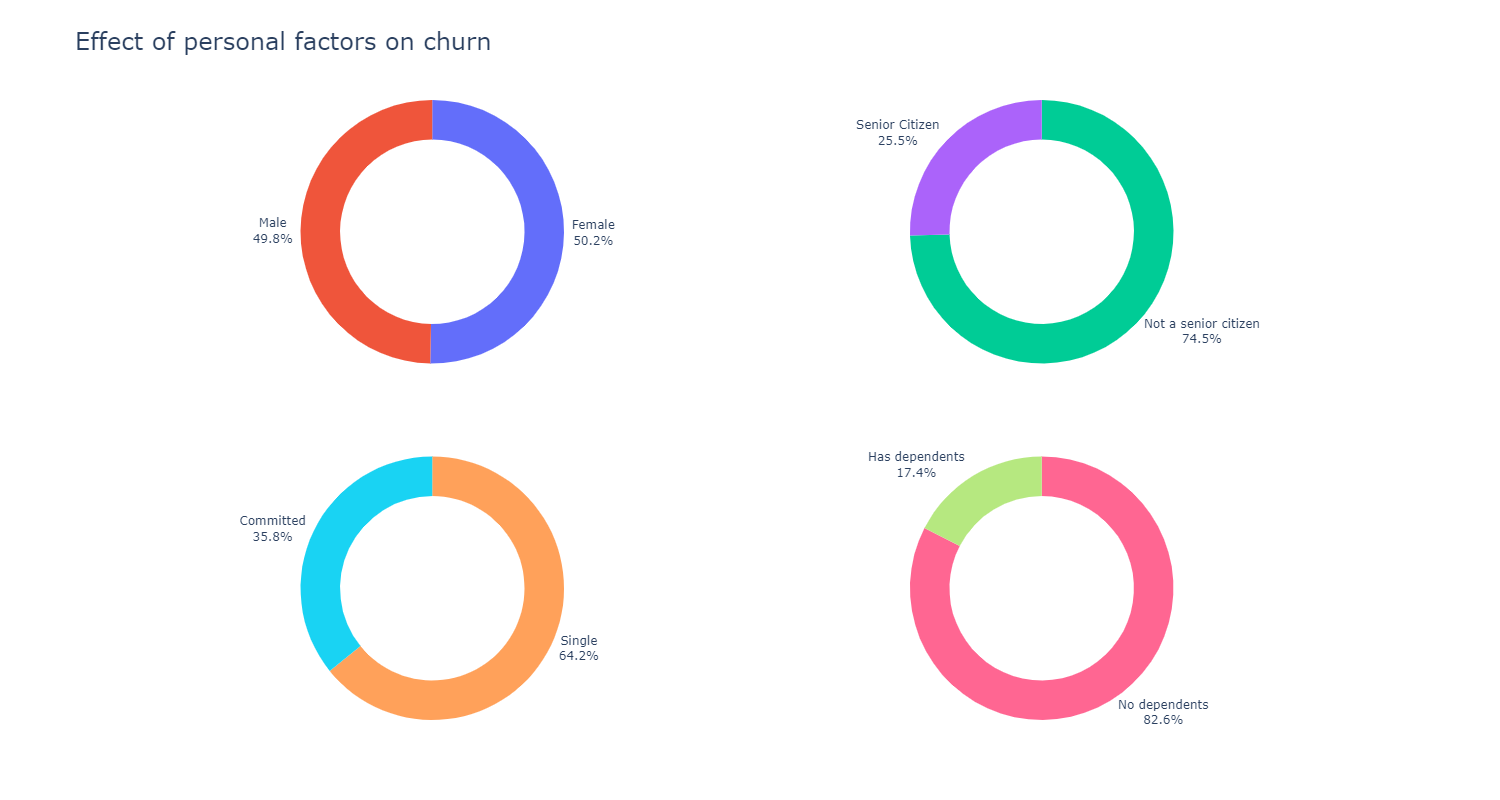

In [4]:
#Getting the values for the pie plot
def personal_features(df):
    t=df[df.Churn=="Yes"].gender.size
    m=(pd.Series(map(int,df[df.Churn=="Yes"].gender=="Male"))).sum()
    f=t-m
    l1=['Male','Female']
    v1=[m,f]

    ts=df[df.Churn=="Yes"].SeniorCitizen.size
    s=(pd.Series(map(int,df[df.Churn=="Yes"].SeniorCitizen==1))).sum()
    ns=ts-s
    l2=['Senior Citizen','Not a senior citizen']
    v2=[s,ns]

    tp=df[df.Churn=="Yes"].Partner.size
    p=(pd.Series(map(int,df[df.Churn=="Yes"].Partner=="Yes"))).sum()
    np=tp-p
    l3=['Committed','Single']
    v3=[p,np]
    td=df[df.Churn=="Yes"].Dependents.size
    d=(pd.Series(map(int,df[df.Churn=="Yes"].Dependents=="Yes"))).sum()
    nd=td-d
    l4=['Has dependents','No dependents']
    v4=[d,nd]

    #Making the figure
    fig = make_subplots(rows=2,cols=2, specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])

    fig.add_trace(go.Pie(labels=l1, values=v1),1,1)
    fig.add_trace(go.Pie(labels=l2, values=v2),1,2)
    fig.add_trace(go.Pie(labels=l3, values=v3),2,1)
    fig.add_trace(go.Pie(labels=l4, values=v4),2,2)

    fig.update_traces(hole=0.7, textinfo='label+percent', insidetextorientation='radial', showlegend=False)
    fig.update_layout(autosize=False, width=1500, height=800)
    fig.update(layout_title_text="Effect of personal factors on churn", layout_title_font_size=24)    
    #fig.show()
Image(filename = "../Data/personal_factors.png")


Observations:

* Gender has no influence on churn.
* Single people are more likely to churn.
* People without dependents are more likely to churn.

## Contract features

Text(0.5, 0.98, 'Relation between the type of contract and churn')

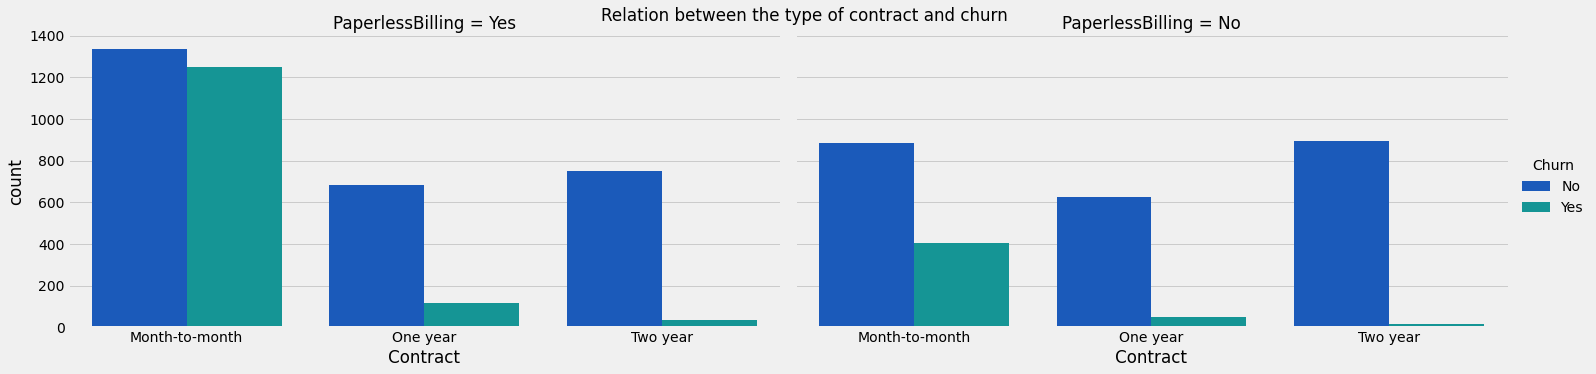

In [5]:
g=sns.catplot(data=df, x="Contract", col="PaperlessBilling", hue="Churn", kind="count", palette="winter", height=5, aspect=2.1)
g.fig.suptitle("Relation between the type of contract and churn")

Observations:

* Maximum people who churn are on a monthly contract and mostly bill in a paperless manner. Maybe these are tech savvy people who switch to a different carrier as soon as they find a better deal.

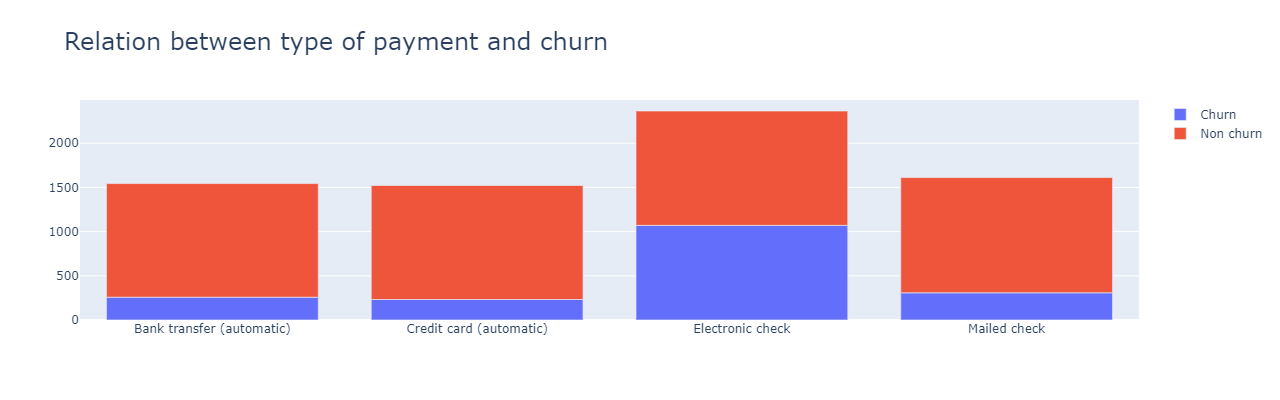

In [6]:
fig1 = go.Figure(data=[
go.Bar(name="Churn", x= pd.DataFrame(df[df.Churn=="Yes"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().index, y=pd.DataFrame(df[df.Churn=="Yes"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().values),
go.Bar(name="Non churn", x= pd.DataFrame(df[df.Churn=="No"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().index, y=pd.DataFrame(df[df.Churn=="No"].PaymentMethod).groupby("PaymentMethod")["PaymentMethod"].count().values)])

# Change the bar mode
fig1.update_layout(barmode='relative', width=1280, height=400)
fig1.update(layout_title_text="Relation between type of payment and churn", layout_title_font_size=24)    
#fig1.show()
Image(filename = "../Data/payment.png")

Observations

* Maximum people who pay electronically, churn. This supports our hypothesis that tech savvy people churn more often.

In [7]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.TotalCharges.fillna(0, inplace=True)

Text(0.5, 1.0, 'Relation between charges and churn')

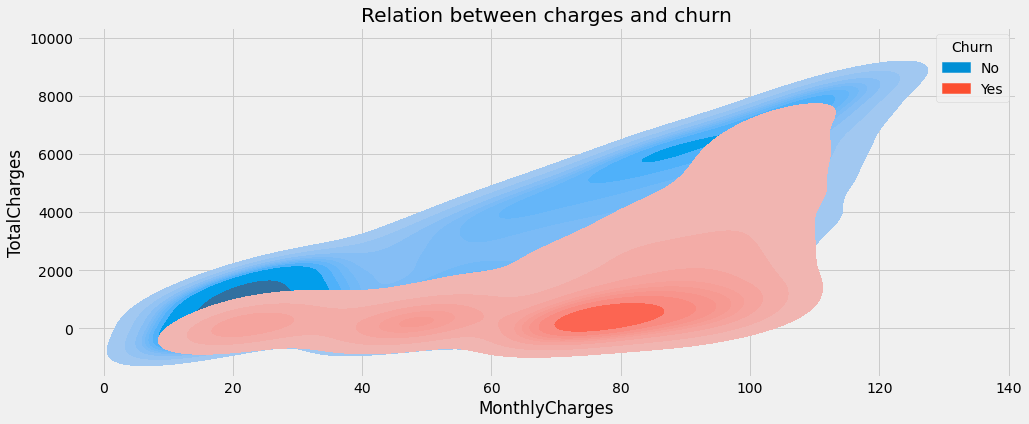

In [8]:
plt.figure(figsize=(15,6))
sns.kdeplot(x=df.MonthlyCharges, y=df.TotalCharges, hue=df.Churn, fill=True, multiple="stack")
plt.title("Relation between charges and churn")

Observations

* Most of the people who churn have low total charges with the carrier.
* Some people who churn are customers who have high monthly and total charges. Maybe these are corporate customers who are churn when they are offered a more competitive offer.

Text(0.5, 1.0, 'Distribution of tenure with churn')

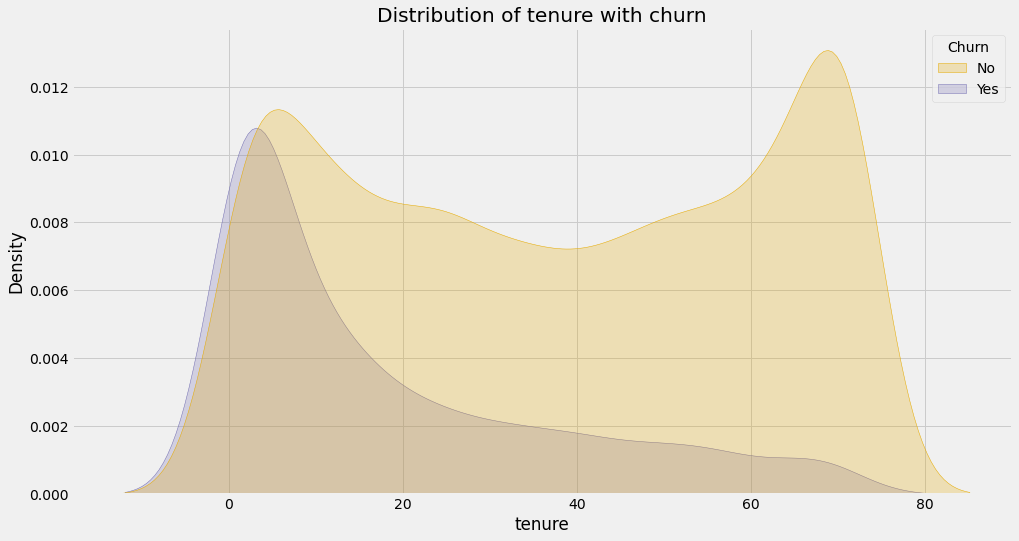

In [9]:
plt.figure(figsize=(15,8))
sns.kdeplot(df.tenure,hue=df.Churn, shade=True, palette="Dark2_r")
plt.title("Distribution of tenure with churn")

Observations:

* Maximum customers churn during the early period of their subscription.

## Service features

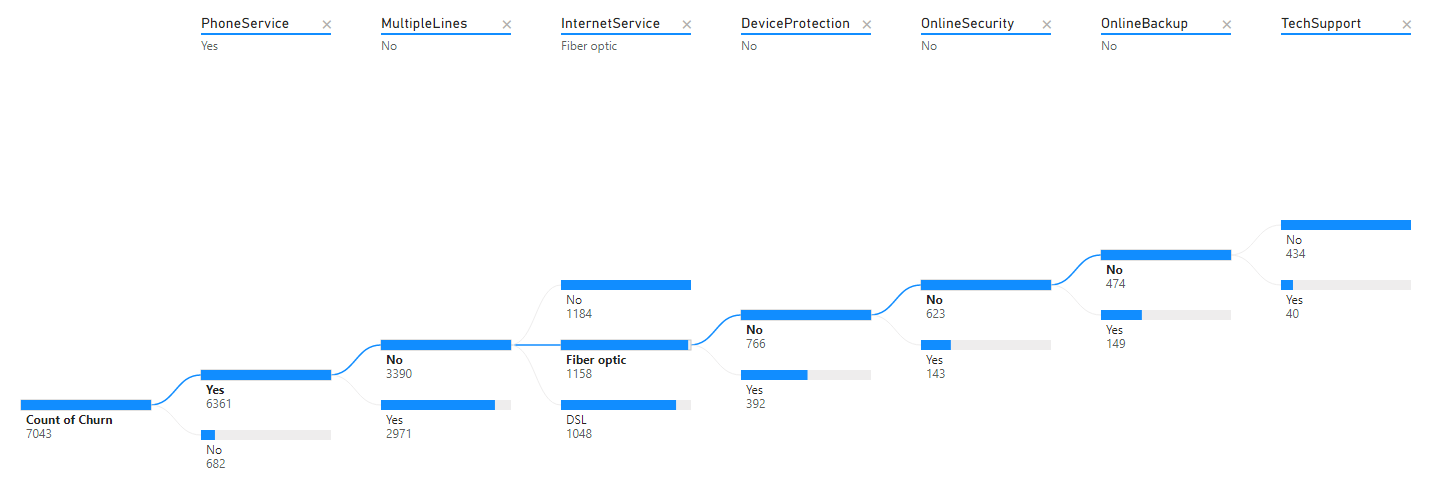

In [10]:
Image(filename = "../Data/img.png")

Observations

* Customers with single phone service and no internet service churn the most. Maybe these are people who are not very well off.
* Among customers with internet service, they choose the faster Fibre optic without any protection/security or backup and churn the most.
* Among these customers who have churned, most have never contacted the tech support.

These customers are probably young tech savvy thrifty customers who change the subscription as soon as they spot a better offer.

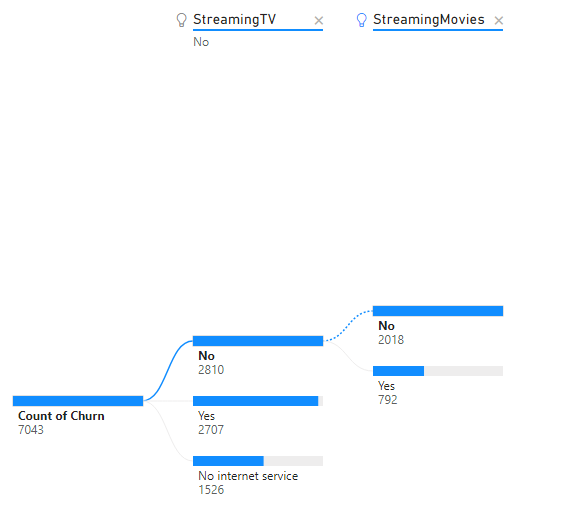

In [11]:
Image(filename = "../Data/img2.png")

Observations:

* Maximum people who churn do not stream movies or TV, i.e. they are not dependent on the subscription for streamed media consumption.

In [33]:
df[['MultipleLines', 'Churn']].groupby(['MultipleLines','Churn'])['Churn'].count()


MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
Name: Churn, dtype: int64

In [30]:
df[['InternetService', 'Churn']].groupby(['InternetService','Churn'])['Churn'].count()

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: Churn, dtype: int64

In [29]:
df[['OnlineSecurity', 'Churn']].groupby(['OnlineSecurity','Churn'])['Churn'].count()

OnlineSecurity       Churn
No                   No       2037
                     Yes      1461
No internet service  No       1413
                     Yes       113
Yes                  No       1724
                     Yes       295
Name: Churn, dtype: int64

In [28]:
df[['OnlineBackup', 'Churn']].groupby(['OnlineBackup','Churn'])['Churn'].count()

OnlineBackup         Churn
No                   No       1855
                     Yes      1233
No internet service  No       1413
                     Yes       113
Yes                  No       1906
                     Yes       523
Name: Churn, dtype: int64

In [27]:
df[['DeviceProtection', 'Churn']].groupby(['DeviceProtection','Churn'])['Churn'].count()

DeviceProtection     Churn
No                   No       1884
                     Yes      1211
No internet service  No       1413
                     Yes       113
Yes                  No       1877
                     Yes       545
Name: Churn, dtype: int64

In [26]:
df[['TechSupport', 'Churn']].groupby(['TechSupport','Churn'])['Churn'].count()

TechSupport          Churn
No                   No       2027
                     Yes      1446
No internet service  No       1413
                     Yes       113
Yes                  No       1734
                     Yes       310
Name: Churn, dtype: int64

In [23]:
df[['StreamingTV', 'Churn']].groupby(['StreamingTV','Churn'])['Churn'].count()

StreamingTV          Churn
No                   No       1868
                     Yes       942
No internet service  No       1413
                     Yes       113
Yes                  No       1893
                     Yes       814
Name: Churn, dtype: int64

In [25]:
df[['StreamingMovies', 'Churn']].groupby(['StreamingMovies','Churn'])['Churn'].count()

StreamingMovies      Churn
No                   No       1847
                     Yes       938
No internet service  No       1413
                     Yes       113
Yes                  No       1914
                     Yes       818
Name: Churn, dtype: int64